In [1]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import twitter_samples, stopwords
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk import FreqDist, classify, NaiveBayesClassifier
import re, string, random
import matplotlib.pyplot as plt

import wordcloud   
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

In [2]:
def remove_noise(tweet_tokens, stop_words = ()):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

# Word Density
def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

# Converting Tokens to a Dictionary        
def get_tweets_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)

In [3]:
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

stop_words = stopwords.words('english')

positive_tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
negative_tweet_tokens = twitter_samples.tokenized('negative_tweets.json')

#print(positive_tweet_tokens)

print(pos_tag(positive_tweet_tokens[0]))


[('#FollowFriday', 'JJ'), ('@France_Inte', 'NNP'), ('@PKuchly57', 'NNP'), ('@Milipol_Paris', 'NNP'), ('for', 'IN'), ('being', 'VBG'), ('top', 'JJ'), ('engaged', 'VBN'), ('members', 'NNS'), ('in', 'IN'), ('my', 'PRP$'), ('community', 'NN'), ('this', 'DT'), ('week', 'NN'), (':)', 'NN')]


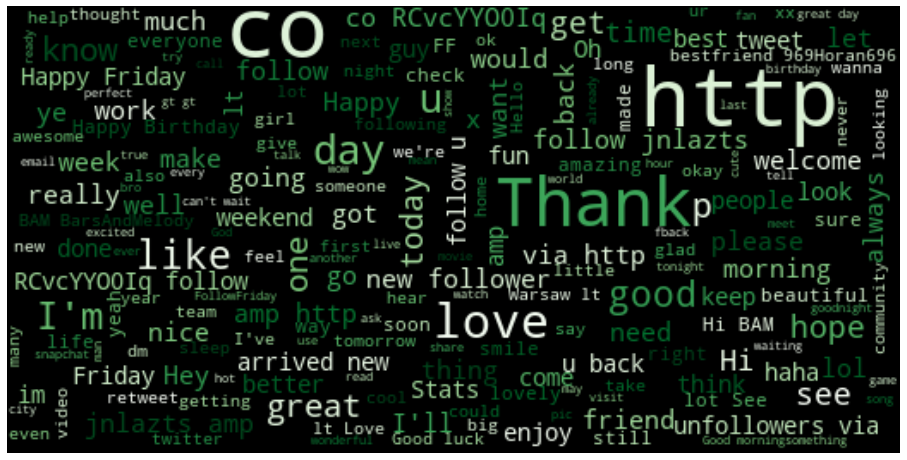

In [4]:
# wordcloud +
positive_tweets_string=(" ").join(positive_tweets)

positive_tweets_cloud = WordCloud(width =520, height =260, stopwords = stop_words, max_font_size=50, 
                          background_color ="black"
                          , colormap='Greens').generate(positive_tweets_string)
plt.figure(figsize=(16,10))
plt.imshow(positive_tweets_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

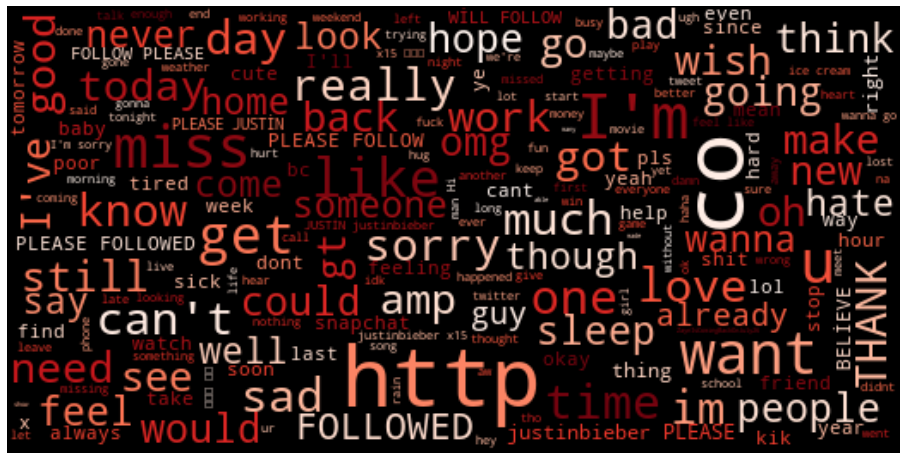

In [5]:
# wordcloud -
negative_tweets_string=(" ").join(negative_tweets)

negative_tweets_cloud = WordCloud(width =520, height =260, stopwords=stop_words,max_font_size=50, background_color ="black", colormap='Reds').generate(negative_tweets_string)
plt.figure(figsize=(16,10))
plt.imshow(negative_tweets_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

In [6]:
positive_cleaned_tokens_list = []
negative_cleaned_tokens_list = []

for tokens in positive_tweet_tokens:
    positive_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

for tokens in negative_tweet_tokens:
    negative_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

print(positive_cleaned_tokens_list)

[['#followfriday', 'top', 'engage', 'member', 'community', 'week', ':)'], ['hey', 'james', 'odd', ':/', 'please', 'call', 'contact', 'centre', '02392441234', 'able', 'assist', ':)', 'many', 'thanks'], ['listen', 'last', 'night', ':)', 'bleed', 'amazing', 'track', 'scotland'], ['congrats', ':)'], ['yeaaaah', 'yippppy', 'accnt', 'verify', 'rqst', 'succeed', 'get', 'blue', 'tick', 'mark', 'fb', 'profile', ':)', '15', 'day'], ['one', 'irresistible', ':)', '#flipkartfashionfriday'], ['like', 'keep', 'lovely', 'customer', 'wait', 'long', 'hope', 'enjoy', 'happy', 'friday', 'lwwf', ':)'], ['second', 'thought', '’', 'enough', 'time', 'dd', ':)', 'new', 'short', 'enter', 'system', 'sheep', 'must', 'buy'], ['jgh', 'go', 'bayan', ':d', 'bye'], ['act', 'mischievousness', 'call', 'etl', 'layer', 'in-house', 'warehouse', 'app', 'katamari', 'well', '…', 'name', 'imply', ':p'], ['#followfriday', 'top', 'influencers', 'community', 'week', ':)'], ['love', 'big', '...', 'juicy', '...', 'selfies', ':)'], 

In [7]:
all_pos_words = get_all_words(positive_cleaned_tokens_list)
freq_dist_pos = FreqDist(all_pos_words)

print(freq_dist_pos)
print(freq_dist_pos.most_common(10))

<FreqDist with 7428 samples and 34505 outcomes>
[(':)', 3691), (':-)', 701), (':d', 658), ('thanks', 388), ('follow', 357), ('love', 333), ('...', 290), ('good', 283), ('get', 263), ('thank', 253)]


In [8]:
positive_tokens_for_model = get_tweets_for_model(positive_cleaned_tokens_list)
negative_tokens_for_model = get_tweets_for_model(negative_cleaned_tokens_list)

positive_dataset = [(tweet_dict, "Positive")
 for tweet_dict in positive_tokens_for_model]

negative_dataset = [(tweet_dict, "Negative")
 for tweet_dict in negative_tokens_for_model]

print(positive_dataset)

[({'#followfriday': True, 'top': True, 'engage': True, 'member': True, 'community': True, 'week': True, ':)': True}, 'Positive'), ({'hey': True, 'james': True, 'odd': True, ':/': True, 'please': True, 'call': True, 'contact': True, 'centre': True, '02392441234': True, 'able': True, 'assist': True, ':)': True, 'many': True, 'thanks': True}, 'Positive'), ({'listen': True, 'last': True, 'night': True, ':)': True, 'bleed': True, 'amazing': True, 'track': True, 'scotland': True}, 'Positive'), ({'congrats': True, ':)': True}, 'Positive'), ({'yeaaaah': True, 'yippppy': True, 'accnt': True, 'verify': True, 'rqst': True, 'succeed': True, 'get': True, 'blue': True, 'tick': True, 'mark': True, 'fb': True, 'profile': True, ':)': True, '15': True, 'day': True}, 'Positive'), ({'one': True, 'irresistible': True, ':)': True, '#flipkartfashionfriday': True}, 'Positive'), ({'like': True, 'keep': True, 'lovely': True, 'customer': True, 'wait': True, 'long': True, 'hope': True, 'enjoy': True, 'happy': Tru

In [9]:
dataset = positive_dataset + negative_dataset
random.shuffle(dataset)

train_data = dataset[:7000]
test_data = dataset[7000:]

classifier = NaiveBayesClassifier.train(train_data)

In [10]:
print("Accuracy is:", classify.accuracy(classifier, test_data))

Accuracy is: 0.995


In [11]:
print(classifier.show_most_informative_features(10))

Most Informative Features
                      :) = True           Positi : Negati =    996.6 : 1.0
                     sad = True           Negati : Positi =     58.8 : 1.0
                follower = True           Positi : Negati =     37.8 : 1.0
                     bam = True           Positi : Negati =     22.4 : 1.0
                  arrive = True           Positi : Negati =     19.5 : 1.0
               community = True           Positi : Negati =     16.4 : 1.0
                     x15 = True           Negati : Positi =     15.0 : 1.0
               goodnight = True           Positi : Negati =     13.7 : 1.0
                followed = True           Negati : Positi =     13.0 : 1.0
                   enjoy = True           Positi : Negati =     12.6 : 1.0
None


In [12]:
# test

custom_tweet = "I had pad thai and it was the best meal in a while. Loved the atmosphere"
custom_tokens = remove_noise(word_tokenize(custom_tweet))
print(custom_tweet)
print(classifier.classify(dict([token, True] for token in custom_tokens)))

I had pad thai and it was the best meal in a while. Loved the atmosphere
Positive


In [13]:
custom_tweet = "Burn in hell"
custom_tokens = remove_noise(word_tokenize(custom_tweet))
print(custom_tweet)
print(classifier.classify(dict([token, True] for token in custom_tokens)))

Burn in hell
Negative


In [14]:
custom_tweet = "I will never come back"
custom_tokens = remove_noise(word_tokenize(custom_tweet))
print(custom_tweet)
print(classifier.classify(dict([token, True] for token in custom_tokens)))

I will never come back
Negative
